# Customer Segmentation

## Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load the Dataset

In [19]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data Preprocessing

In [20]:
df=df.drop('CustomerID',axis=1)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [21]:
df['Genre']=df['Genre'].map({'Male':0, 'Female' :1})
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [22]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


## Finding the Optimal Number of Clusters (k)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

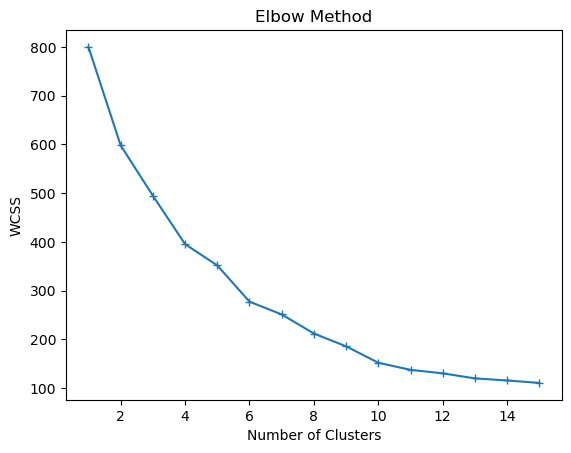

In [23]:
wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit_predict(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,16), wcss, marker="+")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Apply K-Means Clustering

In [24]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
clusters=kmeans.fit_predict(scaled_data)
df['Cluster']=clusters
df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,3
196,1,45,126,28,1
197,0,32,126,74,2
198,0,32,137,18,1


## Visualize the Clusters

### Simple 2D Plot

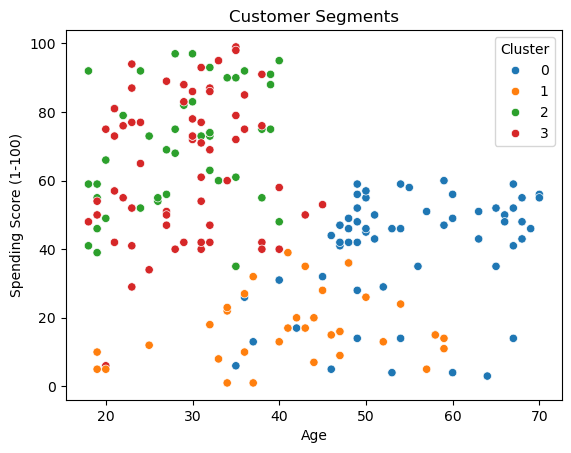

In [25]:
sns.scatterplot(data=df, x='Age',y='Spending Score (1-100)', hue='Cluster',palette='tab10')
plt.title('Customer Segments')
plt.show()

### PCA to reduce Dimensions 

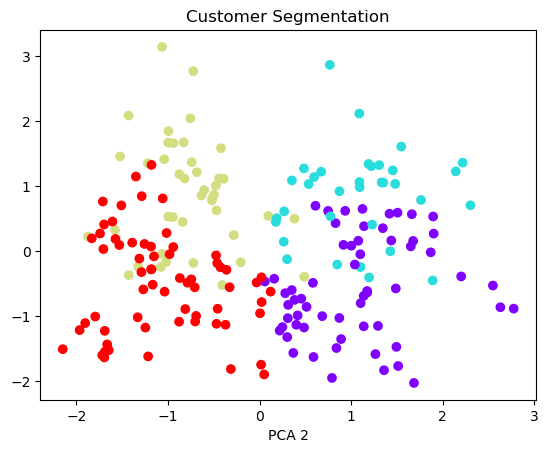

In [26]:
pca=PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_data

plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.show()

## Interpret the Clusters

In [27]:
df.groupby('Cluster').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.566667,54.700000,46.900000,39.933333
1,0.411765,41.264706,88.500000,16.764706
2,0.000000,28.690476,60.904762,70.238095
3,1.000000,29.375000,58.296875,64.437500
